In [1]:
import matplotlib.pyplot as plt
from multi_py.multi import *
import numpy as np
import sys  
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy.io import readsav
import copy
import pandas as pd
import os

## Read in solar spectrum

In [2]:
sav_fname = pjoin('../data/spectra/1631885174310_iag_sun_Si.sav')
sav_data = readsav(sav_fname)
f = open('../data/spectra/sun_kpnomu1_6000_8000A.txt')
obs_spec2 = np.loadtxt(fname=f)


## Read in simulated spectra

In [3]:
def get_lines(thisrun, krs):
    lines = []
    for kr in krs:
        lines.append(thisrun.line[kr])
    return lines 

In [4]:
major_krs = [286, 291, 293, 299, 427, 457] # 292 and 302 removed - empty gaps

runfiles = ['runs/Si_marcs_LTE_run/output/', 'runs/Si_stag_NLTE_5x5x230_run/output/', 'runs/Si_marcs_LTE_newf/output', 'runs/Si_stag_NLTE_5x5x230_newf/output']
labels = [ '1D LTE', '3D NLTE', '1D LTE new f val', '3D NLTE new f val']
runobjects = [m3d(thisrun, lines=major_krs, conts=[]) for thisrun in runfiles]
linesobj = [get_lines(thisrunobj, major_krs) for thisrunobj in runobjects]

Completed reading parameters from runs/Si_stag_NLTE_5x5x230_newf/output/


In [5]:
wavelengths = [line.lam0 for line in linesobj[0]]
m3d_centre_wavelengths = [5645.613, 5684.484, 5701.104, 5772.146, 7034.901, 7226.208]
lam = sav_data['iag_sun'].wave[0][0]
flux = sav_data['iag_sun'].flux[0][0]

In [6]:
# # Calc change between old and new f-value 1D LTE lines for line 1
# # old 1D:
# adj_factor = np.divide(linesobj[2][0].nflux, linesobj[0][0].nflux)
# adj_1DLTE = copy.deepcopy(linesobj[0][0])
# adj_1DLTE.nflux  = adj_1DLTE.nflux * adj_factor

# adj_3DNLTE = copy.deepcopy(linesobj[1][0])
# adj_3DNLTE.nflux = adj_3DNLTE.nflux * adj_factor

In [7]:
major_krs

[286, 291, 293, 299, 427, 457]

## Plot strong lines 

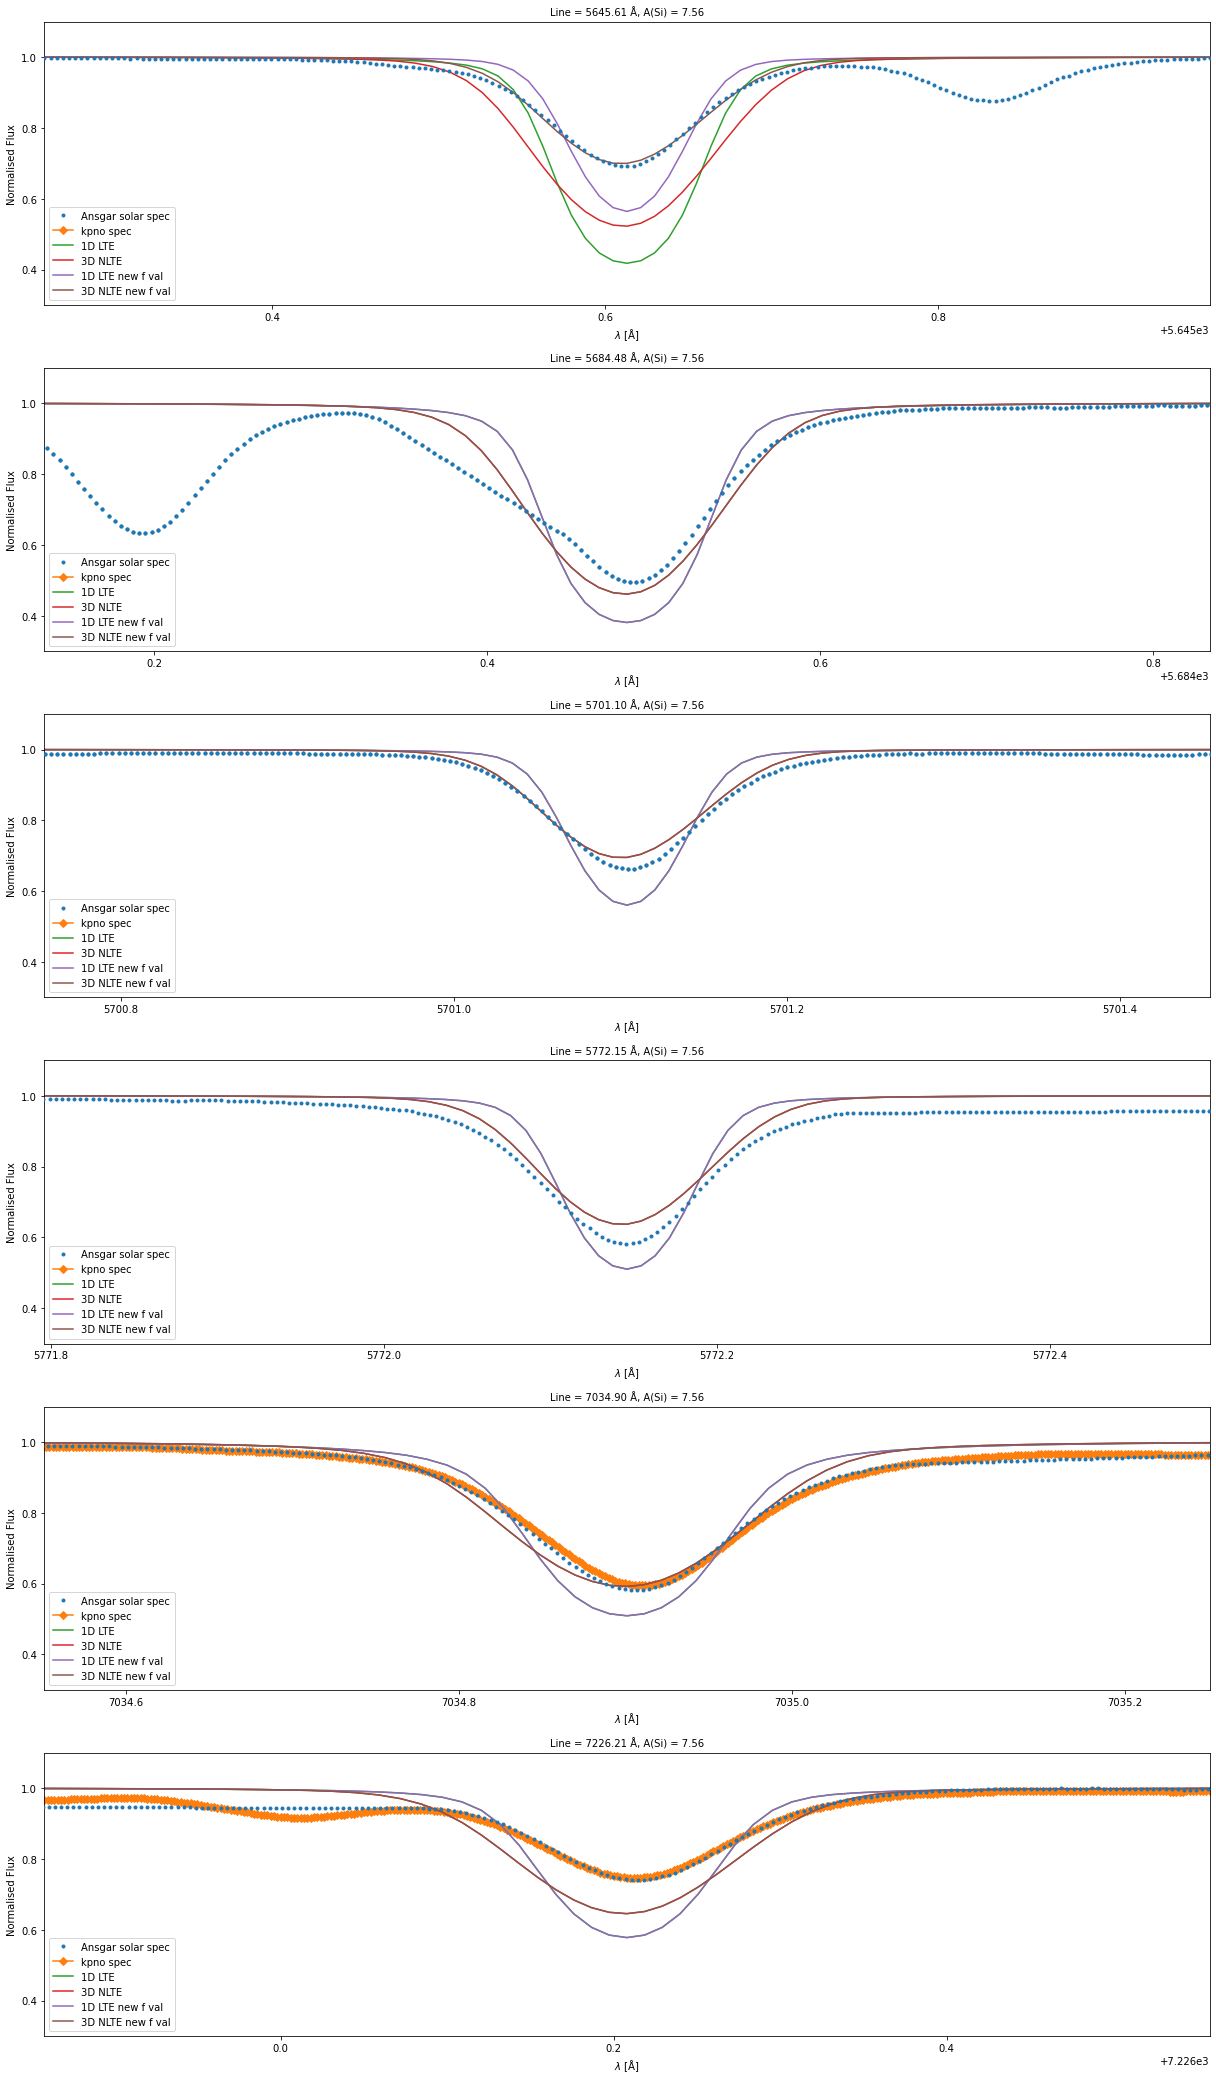

In [8]:
fig, ax = plt.subplots(len(major_krs), 1, figsize=(17,29))
for i, thiskr in enumerate(major_krs):
    plt.sca(ax[i])

    ax[i].plot(lam, flux, linestyle='none', marker='.', zorder=100, label='Ansgar solar spec')
    ax[i].plot(obs_spec2[:,0], obs_spec2[:,1], label='kpno spec', marker='D')

    # adj_3DNLTE.plot(qmax=3.5, label='adjusted 3D NLTE', marker='o')
    # plt.plot(adj_3DNLTE.lam, adj_3DNLTE.nflux, label='adjusted 3D NLTE', marker='o')

    plt.xlim((m3d_centre_wavelengths[i]-0.35), (m3d_centre_wavelengths[i]+0.35))
    plt.ylim(0.3,1.1)
    for j, run in enumerate(linesobj[:]):
        linesobj[j][i].plot(qmax=3.5, label=labels[j], lam0=m3d_centre_wavelengths[i])
    plt.legend()

# plot adjusted 1D line

plt.tight_layout()
plt.savefig('spec_comp.pdf')

In [9]:
vac = np.array([7036.841], dtype=np.float64)

vacuum2obs(vac)



array([7034.89736437])

In [10]:
(10**(-1.63))/3



0.00781409605106641

(7034.7, 7035.2)

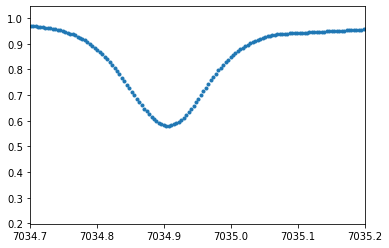

In [11]:
plt.plot(lam, flux, linestyle='none', marker='.', zorder=1, label='solar spec')
plt.xlim(7034.7,7035.2)


In [12]:
vac = np.array([7228.199], dtype=np.float64)

vacuum2obs(vac)

array([7226.20359421])

In [13]:
d = {'lambda_atom Å': [7034.901,5645.613,5684.484, 5701.104,  5772.146, 7226.208],  'lambda paper(obs)Å': [7034.897, 564.5613, 5684.484, 5701.105, 5772.146, '-'], 
'e_up (atom)cm-1':[61563.305, 57468.238, 57541.918, 57295.883, 58311.660, 59110.891 ], 'g_up (atom)':[16,5, 3, 1, 1,5],
'e_low (atom)cm-1':[47351.555, 39760.285, 39955.055, 39760.285, 40991.883, 45276.188 ], 'g_low(atom)':[5,3, 5, 3, 3, 3], 'e_up(paper)cm-1':[61402, 57316, 57393, 57149, 58240,'-'], 
'e_low(paper)cm-1': [47292, 39720, 39910, 39720, 40969, '-']}
# 'e_diff(atom)cm-1': [14211.75], 'e_diff (paper) cm-1':[14210.923]}

#'lambda_M3Doutput Å': [7034.49], 'lambda paper(vac)Å': [7036.841],

df = pd.DataFrame(data=d)
df

,lambda_atom Å,lambda paper(obs)Å,e_up (atom)cm-1,g_up (atom),e_low (atom)cm-1,g_low(atom),e_up(paper)cm-1,e_low(paper)cm-1
0,7034.901,7034.897,61563.305,16,47351.555,5,61402,47292
1,5645.613,564.5613,57468.238,5,39760.285,3,57316,39720
2,5684.484,5684.484,57541.918,3,39955.055,5,57393,39910
3,5701.104,5701.105,57295.883,1,39760.285,3,57149,39720
4,5772.146,5772.146,58311.660,1,40991.883,3,58240,40969
5,7226.208,-,59110.891,5,45276.188,3,-,-


In [14]:
example_string = df.to_string()
output_file = open('line_comp.txt','a')
output_file.write(example_string)
output_file.close()

### Function to generate the mu output angles

In [15]:
mu_zs = [1.0, 0.9, 0.8, 0.6, 0.4, 0.2]
muzout = [1.0]
muxout = [0]
muyout = [0]

for mu_z in mu_zs[1:]:
    conjugate = np.round(np.sqrt(1-mu_z**2),4)
    for i in range(4):
        muzout.append(mu_z)
    muxout.extend((conjugate, 0.0, -conjugate, 0.0))
    muyout.extend((0.0, conjugate, 0.0, -conjugate))

print('muxout = :',*muxout)
print('muyout = :',*muyout)
print('muzout = :',*muzout)

muxout = : 0 0.4359 0.0 -0.4359 0.0 0.6 0.0 -0.6 0.0 0.8 0.0 -0.8 0.0 0.9165 0.0 -0.9165 0.0 0.9798 0.0 -0.9798 0.0
muyout = : 0 0.0 0.4359 0.0 -0.4359 0.0 0.6 0.0 -0.6 0.0 0.8 0.0 -0.8 0.0 0.9165 0.0 -0.9165 0.0 0.9798 0.0 -0.9798
muzout = : 1.0 0.9 0.9 0.9 0.9 0.8 0.8 0.8 0.8 0.6 0.6 0.6 0.6 0.4 0.4 0.4 0.4 0.2 0.2 0.2 0.2


In [16]:
np.sqrt(1-0.8**2)

0.5999999999999999